# EXPLORING FACTORS INFLUENCING TITANIC SURVIVAL RATE

Titanic, British luxury passenger liner that sank on April 14–15, 1912, during its maiden voyage, en route to New York City from Southampton, England, killing about 1,500 passengers and ship personnel. 
One of the most famous tragedies in modern history, it inspired numerous stories, several films, and a musical and has been the subject of much scholarship and scientific speculation.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

The dataset used in the EDA was gotten from https://www.kaggle.com/competitions/titanic/data?select=train.csv 

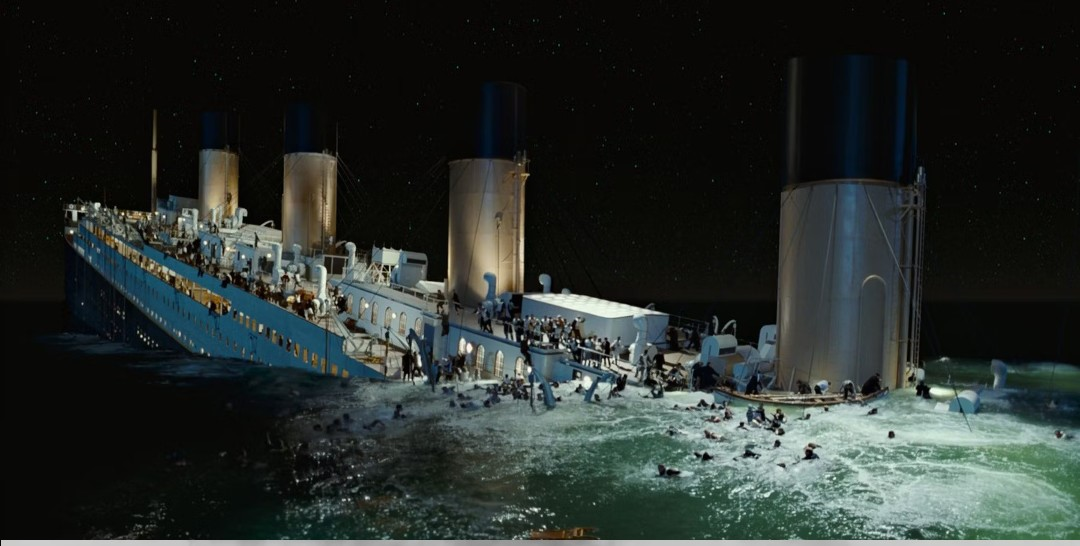

## Importing my libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#imporitng my dataset
df = pd.read_csv('train.csv')

In [3]:
# This function will be used to add value label to the Column/Bar chart

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center')

## Observing the Data

In [4]:
# Cheking the shape of my dataset to know how many columns and rows there are.

df.shape

(891, 12)

In [5]:
# previewing the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#listing out my columns

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# checking for empty values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#checking data types of columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Part 1: Data Cleaning

**- There are missing values in the columns "Cabin" , "Age" and "Embarked"**

**- The column "Cabin" is having over 70% missing values, hence it will be dropped**

**- The "Age" column has missing values and we will be deleting the empty cells**

**- The "Embarked" column has missing values that will be filled out with the mode of the available values**

In [10]:
#dropping the "cabin" column

df.drop(columns=['Cabin'], inplace = True)

In [11]:
#filling the missing values in the "Embarked" column with the mode ('S')

df['Embarked'].value_counts()
df['Embarked'].fillna('S', inplace=True)

In [12]:
#drop empty rows, to delete missing values in "Age" column 

df_clean = df.dropna()

# Part 2: Exploratory Data Analysis (EDA)

**Summary Statistics of Dataset**

In [13]:
#The describe() function is used to generate descriptive statistical summary of the dataset

df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,714.0,448.582633,259.119524,1.00,222.250,445.0000,677.750,891.0000
Survived,714.0,0.406162,0.491460,0.00,0.000,0.0000,1.000,1.0000
Pclass,714.0,2.236695,0.838250,1.00,1.000,2.0000,3.000,3.0000
Age,714.0,29.699118,14.526497,0.42,20.125,28.0000,38.000,80.0000
SibSp,714.0,0.512605,0.929783,0.00,0.000,0.0000,1.000,5.0000
Parch,714.0,0.431373,0.853289,0.00,0.000,0.0000,1.000,6.0000
Fare,714.0,34.694514,52.918930,0.00,8.050,15.7417,33.375,512.3292


**With the information above we can say that, for:**

**Passengers:** There are 714 passengers on the dataset.
    
**Survived:** There is an average of approximately 0.406 of the total passengers that survived, that is about 40.6% of total passengers aboard, 714, will show we have 290 Survivals, and 424 Non-Survivals 

**Pclass:** There is an average of 2.2 on Pclass, which tells us that there were more passengers
in the 2nd and 3rd class, also there were more passengers on the 3rd class as it shows that 50%
of passengers belong to class "3"

**SibSp:** 75% of the passengers had at most 1 sibling or spouse aboard with them.
    
**Age:** The average age of passengers is approximately 29.69 years. Also with the minimum age at 0.42 year- approximately 5 months old, 
and maximum at 80 years, this tells us that the passengers on board ranged from Infants to Adults.

**Parch:** There was average of approximately 0.43 Parent or Children aboard, majority of the passengers were without 1 or less parent or children, with 75% showing '1'.

**Fare:** The average fare paid by passengers was approximately £34.69, 75% of the passengers paid below average at £33.37 or less, this shows that only few paid high fares.

**Correlation Matrix:**

In [14]:
#The function 'Corr()' is used to find correlation between different Features
df_clean.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_57832\458707606.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.035349,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.082398,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,-0.011617,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,0.009592,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


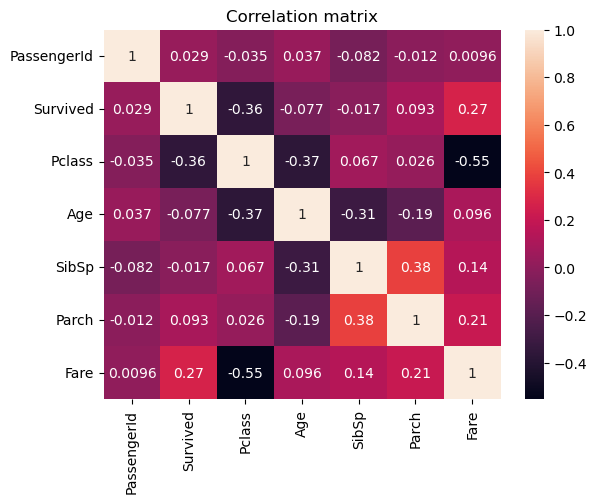

In [15]:
sns.heatmap(df_clean.corr(numeric_only = True), annot = True)
plt.title("Correlation matrix");

# Data Visualization

- Numbers of passengers that survived.

In [16]:
df_clean['Survived'].value_counts()

# Percentage of passengers that survived
(df_clean["Survived"].value_counts()/(df_clean["Survived"].value_counts()).sum())*100


0    59.383754
1    40.616246
Name: Survived, dtype: float64

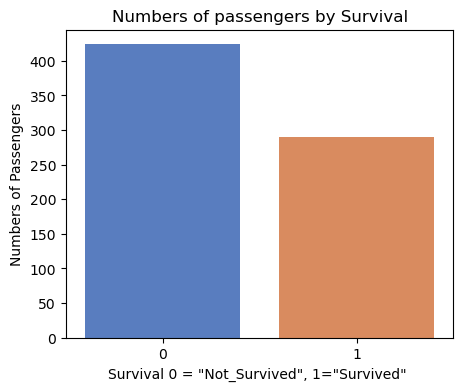

In [17]:
## Visualization of Numbers of passengers by Survival.

plt.figure(figsize=(5,4))
sns.countplot(x=df_clean["Survived"], palette = 'muted')
plt.xlabel('Survival 0 = "Not_Survived", 1="Survived" ')
plt.ylabel('Numbers of Passengers')
plt.title('Numbers of passengers by Survival');

In [18]:
# Percentage of males that survived from total males present on board

df_male = df_clean["Sex"] == "male" 
df_surv = df_clean["Survived"] == 1
df_male_surv = df_male & df_surv

male_surv = df_male_surv.sum()/df_male.sum() *100
print (f"Percentage of males that survived from the total males present onboard is {male_surv}")

 # Percentage of females that survived from total females present on board
df_female = df_clean["Sex"] == "female" 
df_surv = df_clean["Survived"] == 1
df_female_surv = df_female & df_surv

female_surv = df_female_surv.sum()/df_female.sum() *100
print (f"Percentage of females that survived from the total males present onboard is {female_surv}")

Percentage of males that survived from the total males present onboard is 20.52980132450331
Percentage of females that survived from the total males present onboard is 75.47892720306514


#### - Total number of Survival by Passenger class

In [19]:
#Calculating the % of passengers that Survived by the Passenger Class (Pclass)

survival_by_Pclass = df_clean['Survived'].groupby(by=df_clean['Pclass']).sum()
round(survival_by_Pclass/survival_by_Pclass.sum()*100, 2)

Pclass
1    42.07
2    28.62
3    29.31
Name: Survived, dtype: float64

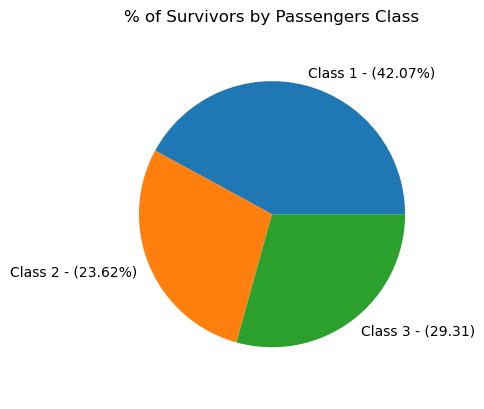

In [20]:
#Visualizization of Surivors by Pclass
keys = ['Class 1 - (42.07%)', 'Class 2 - (23.62%)', 'Class 3 - (29.31)']

plt.pie(survival_by_Pclass, labels = keys, radius=0.9)
plt.title ('% of Survivors by Passengers Class');

#### - Survival Rate by port of Embarkation

In [21]:
# Numbers of Survivors by the port of Embarkation 
survival_by_Embarked = df['Survived'].groupby(by=df['Embarked']).sum()

# Percentage of Survivors by port of Embarkation
survival_by_Embarked/survival_by_Embarked.sum()*100

Embarked
C    27.192982
Q     8.771930
S    64.035088
Name: Survived, dtype: float64

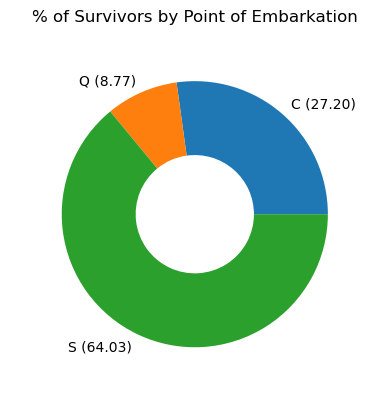

In [22]:
#Visualization of the Survival rate by port of Embarkation

keys = ['C (27.20)', 'Q (8.77)', 'S (64.03)']
plt.pie(survival_by_Embarked, labels = keys, radius = 0.9, wedgeprops = dict(width=0.5))
plt.title ('% of Survivors by Point of Embarkation');

**Average age of Survivors and Non-Survivors**

In [23]:
##Average age of Survivors and Non-Survivors

Avg_age_Survived = round(df['Age'].groupby(by=df['Survived']).mean().reset_index(),2)
Avg_age_Survived


,Survived,Age
0,0,30.63
1,1,28.34


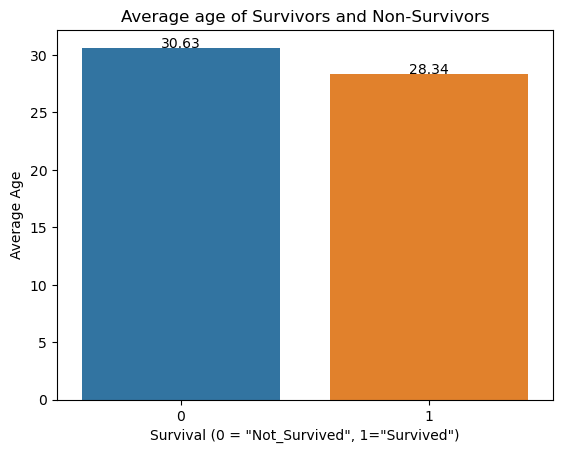

In [24]:
#Visualization of Average age of Survivors and Non-Survivors

sns.barplot(data = Avg_age_Survived, x='Survived', y='Age')
plt.title('Average age of Survivors and Non-Survivors')
plt.xlabel('Survival (0 = "Not_Survived", 1="Survived")')
plt.ylabel('Average Age')

addlabels(Avg_age_Survived['Survived'].to_list(), Avg_age_Survived['Age'].to_list());

**Survival Rate by Gender**

In [25]:
# Numbers of Survivors by Gender
survival_by_gender = df['Survived'].groupby(by=df['Sex']).sum()

#Percentage of Survivals by Gender
survival_by_gender/survival_by_gender.sum()*100

Sex
female    68.128655
male      31.871345
Name: Survived, dtype: float64

In [26]:
survival_by_gender

Sex
female    233
male      109
Name: Survived, dtype: int64

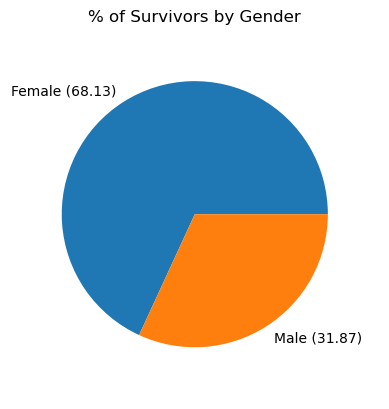

In [27]:
#Visulaization of Survival Rate by Gender
keys = ['Female (68.13)', 'Male (31.87)']

plt.pie(survival_by_gender, labels = keys, radius=0.9)
plt.title ('% of Survivors by Gender');

**Survival Rate by Age Category**

In [28]:
## Because of the high spread of the "Age" (0-80 years) we have, best to put them in categories for better Visualization

#using the 10-range intervals as bin
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

#creating a label for our range of "Age Category"
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

## Adding the 'Age Category' as a new column to the DataFrame
df_clean['age_category'] = pd.cut(df_clean['Age'], bins = bins, labels = labels, right=False)

survival_by_Age = df_clean['Survived'].groupby(by=df_clean['age_category']).sum().sort_values().reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_57832\1291979255.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age_category'] = pd.cut(df_clean['Age'], bins = bins, labels = labels, right=False)


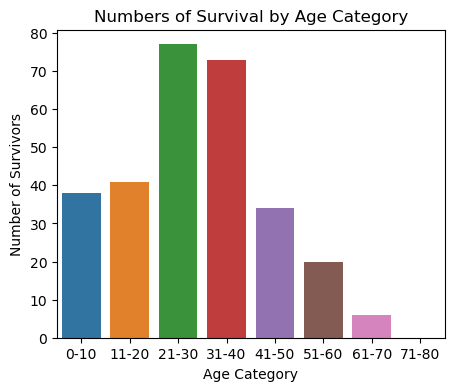

In [29]:
#Visualization of Suvivors by Age Category

plt.figure(figsize=(5,4))
sns.barplot(data =survival_by_Age, x='age_category', y='Survived')
plt.title('Numbers of Survival by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Survivors');

### Distribution/Variation of Numerical Variables 

''

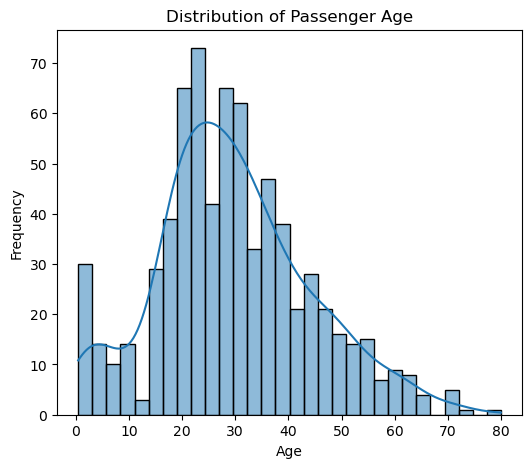

In [30]:
#Distribution of Passenger's Age

plt.figure(figsize=(6,5))
sns.histplot(df_clean['Age'], bins=30, kde=True)
plt.title("Distribution of Passenger Age")
plt.xlabel('Age')
plt.ylabel('Frequency')
;

''

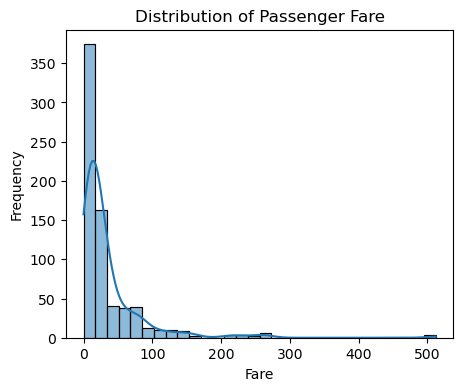

In [31]:
#Distribution of Passenger Fare

plt.figure(figsize=(5,4))
sns.histplot(df_clean['Fare'], bins=30, kde=True)
plt.title("Distribution of Passenger Fare")
plt.xlabel('Fare')
plt.ylabel('Frequency')
;

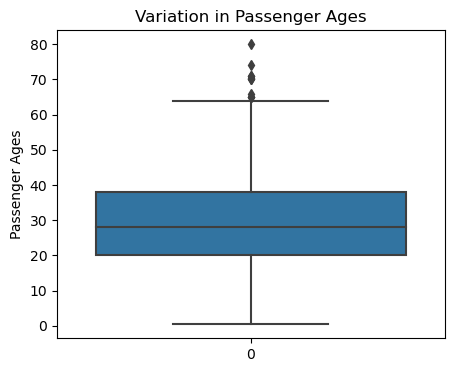

In [32]:
# # Visualizing the variation of Passengers' Age

plt.figure(figsize=(5,4))
sns.boxplot(data=df_clean['Age'])
plt.ylabel("Passenger Ages")
plt.title('Variation in Passenger Ages');


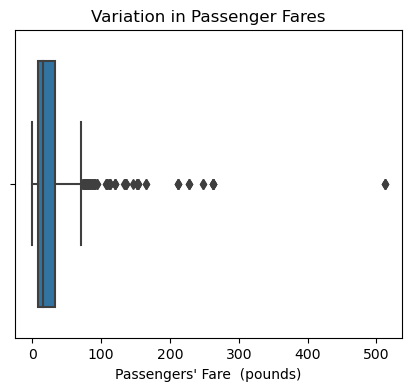

In [33]:
# Visualizing the variation of Passengers' Fare

plt.figure(figsize=(5,4))
sns.boxplot(x=df_clean['Fare'])
plt.xlabel("Passengers' Fare  (pounds)")
plt.title("Variation in Passenger Fares");

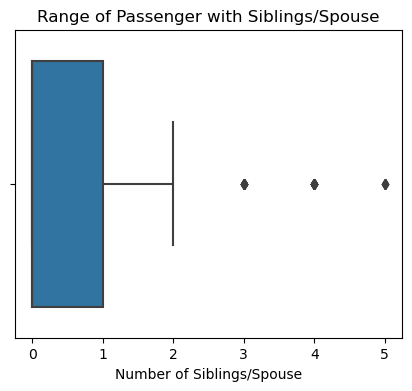

In [34]:
## Visualizing the variation of Passenger with Siblings/Spouse

plt.figure(figsize=(5,4))
sns.boxplot(x=df_clean['SibSp'])
plt.xlabel("Number of Siblings/Spouse")
plt.title("Range of Passenger with Siblings/Spouse");

### Visualization of Categorical Variables 

In [35]:
## Numbers of passengers in Each Cabin Class.
df_clean['Pclass'].value_counts()

3    355
1    186
2    173
Name: Pclass, dtype: int64

''

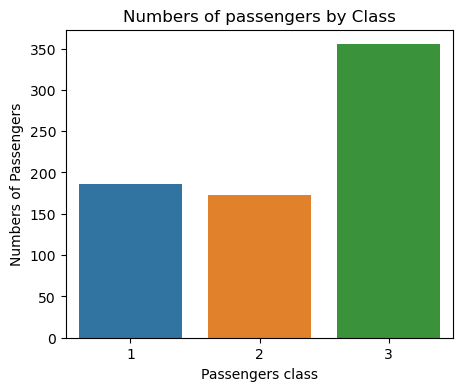

In [36]:
## Visualization of Numbers of passengers in Each Cabin Class.

plt.figure(figsize=(5,4))
sns.countplot(x=df_clean["Pclass"])
plt.xlabel('Passengers class')
plt.ylabel('Numbers of Passengers')
plt.title('Numbers of passengers by Class')
;

In [37]:
#Number of Passengers by Gender group
df_clean['Sex'].value_counts()

male      453
female    261
Name: Sex, dtype: int64

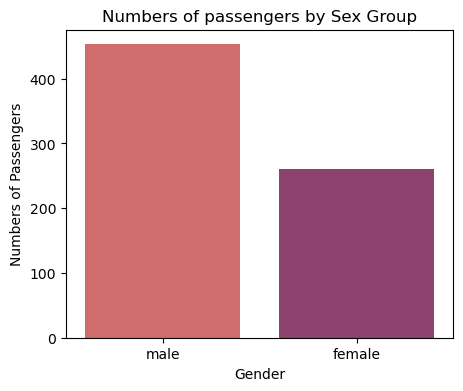

In [38]:
## Visualization of Numbers of passengers by Gender group.
df['Sex'].value_counts()

plt.figure(figsize=(5,4))
sns.countplot(x=df_clean["Sex"], palette = 'flare')
plt.xlabel('Gender')
plt.ylabel('Numbers of Passengers')
plt.title('Numbers of passengers by Sex Group');

In [39]:
# Numbers of passengers by Port of Embarkation..

df_clean['Embarked'].value_counts()

S    556
C    130
Q     28
Name: Embarked, dtype: int64

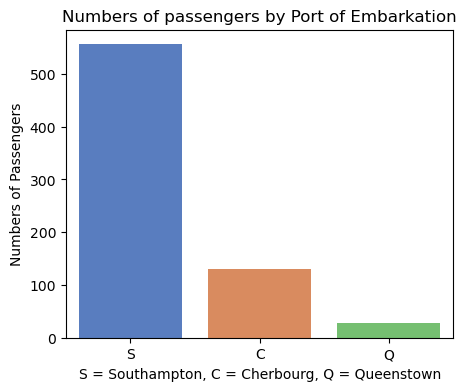

In [40]:
## Visualization of the number of passengers by Port of Embarkation.

plt.figure(figsize=(5,4))
sns.countplot(x=df_clean["Embarked"], palette = 'muted')
plt.xlabel('S = Southampton, C = Cherbourg, Q = Queenstown')
plt.ylabel('Numbers of Passengers')
plt.title('Numbers of passengers by Port of Embarkation');

In [41]:
#Numbers of passengers by Survival.

df_clean['Survived'].value_counts()

0    424
1    290
Name: Survived, dtype: int64

In [42]:
# Percentage of passengers that survived
(df_clean["Survived"].value_counts()/(df_clean["Survived"].value_counts()).sum())*100

0    59.383754
1    40.616246
Name: Survived, dtype: float64

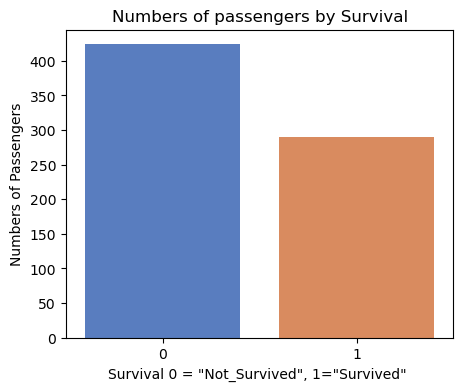

In [43]:
## Visualization of Numbers of passengers by Survival.

plt.figure(figsize=(5,4))
sns.countplot(x=df_clean["Survived"], palette = 'muted')
plt.xlabel('Survival 0 = "Not_Survived", 1="Survived" ')
plt.ylabel('Numbers of Passengers')
plt.title('Numbers of passengers by Survival');

In [44]:
# Percentage of men that survived from total men present on board

df_male = df["Sex"] == "male" 
df_surv = df["Survived"] == 1
df_male_surv = df_male & df_surv

df_male_surv.sum()/df_male.sum() *100

 # Percentage of men that survived from total men present on board
df_female = df["Sex"] == "female" 
df_surv = df["Survived"] == 1
df_female_surv = df_female & df_surv

df_female_surv.sum()/df_female.sum() *100

74.20382165605095

## Part 3: Analysis Questions and Insights

### 1. What percentage of passengers survived the Titanic?

**- According to our Statistical Analysis, 41% of the Passengers aboard had survived.**

### 2. What was the survival rate for each Pclass?

**- Class 1 - (42.07%), Class 2 - (23.62%), Class 3 - (29.31%)**

### 3. Were gender and survival correlated? Provide statistics.

**-Statistically 20.52% out of Total men survived, while 75.47% of Total Female survived as shown at the cell No. 18, this shows
gender and survival are correlated, as Female had much higher chance at survival than Male**

### 4. What was the average age of survivors and non-survivors?

**-Average age of non-survivors = 30.63, while the average age Survivors = 28.34**

### 5. Did having siblings or spouses on board affect the survival rate?


**-According to our correlation matrix at cell No. 15, correlation value between Survived and SibSp (siblings or spouses) is at - 0.017358. This suggests that having siblings or spouses aboard has little to no effect on the survival rate.**

### 6.What was the survival rate based on the port of embarkation?

**-Points of Embarkation : S = Southampton, C = Cherbourg, Q = Queenstown**
    
**-C = 27.19 %, Q = 8.77 %, S = 64.04 %**

**-Passengers who boarded from Southampton had the highest survival, with Queenstown having the lowest survival rate.**




### 7. How did fare correlate with survival? Did higher fare-paying passengers have better survival?

**-According to our correlation matrix at cell No. 15, correlation value between Survived and Fare is at 0.268189, which indicate a positive correlation relationship. This suggests that passengers who paid a higher fare had a higher likelihood of surviving compared to someone who paid a lower fare.**

### 8. Were age and Pclass correlated? Provide a visualization.

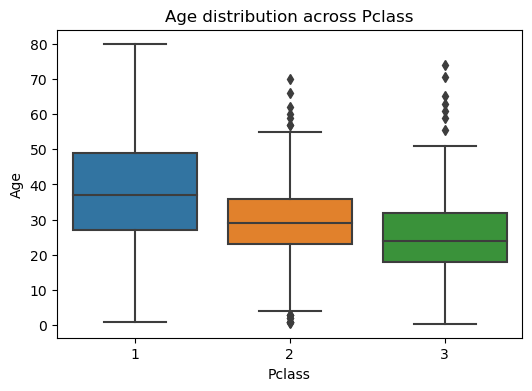

In [45]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Pclass", y="Age", data=df_clean)
plt.title("Age distribution across Pclass")
plt.xlabel("Pclass")
plt.ylabel("Age")
plt.show()

**-According to the correlation matrix, correlation value between Pclass and Age is at − 0.369226, this suggests that as one goes up the other goes down, increase in age means lower class number ('1' being the lowest class number)**

**-As shown on the chart above, the older passengers are more likely to be in 1st class (class '1') and the younger passengers are more like to be in 3rd class (class '3')**

## Insights:

**- Passengers in the first class have more chance of survival than passengers in the other classes reason might have been because First-class compartments were located on the upper decks, making it more accessible to lifeboats when the order to abandon ship was given. In contrast, third-class passengers were situated in lower compartments, making escape more difficult especially when the ship started to flood.**

**- There was high survival rate for women compared to men. This must be due to the "Women and Children First" protocol: This was a code of conduct that prioritized the safety of women and children during life-threatening situations at sea. When the Titanic started sinking, this unwritten rule was largely adhered to, particularly in the first and second class sections of the ship. As lifeboats began to be lowered, women and children were given precedence, which contributed significantly to their higher survival rate.**

**- Younger passengers had higher rate of survival. There's perspective where younger individuals might have been quicker to react to the crisis. Also they can build more resilience, from physically enduring the cold waters after the ship sank, to being more agile in moving around the ship and finding a lifeboat.**

**- The fare passengers paid directly related to the class of ticket they purchased. First-class tickets were the most expensive, followed by second and third class. As established in previous insight, first-class passengers had a higher survival rate. Their cabins were located on the upper decks, closer to lifeboats, and they generally received priority during evacuation.**

**- The older passengers are more likely to be in 1st class (class '1') due to having had more time to amass wealth or attain prominent societal positions and the younger passengers are more like to be in 3rd class (class '3'), they might not have achieved the same level of financial security, which will make them settle for more affordable ticket.**